<a href="https://colab.research.google.com/github/baem68/MGMT6560/blob/master/Project_Bae_Minsoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [4]:
train.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [5]:
test.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
dtype: object

In [2]:
#convert pickup datetime to the datetime data type
train["pickup_datetime"]= pd.to_datetime(train.pickup_datetime, errors = 'coerce')
test["pickup_datetime"] = pd.to_datetime(test.pickup_datetime, errors = 'coerce')


In [3]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [4]:
test.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [5]:
#dropping trips of over 12 hours as trips are within the NYC area and are too short in distance to likely be of such duration
train.drop(train[(train['trip_duration'] > 43200)].index,inplace = True) 

In [6]:
! pip install haversine

In [7]:
#calculating the distance between the pickup and drop off points
#we calculate the latitude distance and the longitude distance to account for the grid like nature of NYC's street grid
from haversine import haversine
train["lat_distance"] = train.apply(lambda x: haversine((x["pickup_latitude"],x["pickup_longitude"]),(x["dropoff_latitude"],x["pickup_longitude"])),axis=1)
train["long_distance"] = train.apply(lambda x: haversine((x["pickup_latitude"],x["pickup_longitude"]),(x["pickup_latitude"],x["dropoff_longitude"])),axis=1)
train["distance"] = train["lat_distance"]+train["long_distance"]

test["lat_distance"] = test.apply(lambda x: haversine((x["pickup_latitude"],x["pickup_longitude"]),(x["dropoff_latitude"],x["pickup_longitude"])),axis=1)
test["long_distance"] = test.apply(lambda x: haversine((x["pickup_latitude"],x["pickup_longitude"]),(x["pickup_latitude"],x["dropoff_longitude"])),axis=1)
test["distance"] = test["lat_distance"]+test["long_distance"]

In [44]:
#data cleanup
#Trips with average speed of over 80 mph and passenger count 0 dropped
train.drop(train[(train['distance']/train['trip_duration'])>.036].index,inplace = True) 
train.drop(train[(train['passenger_count'])==0].index,inplace= True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


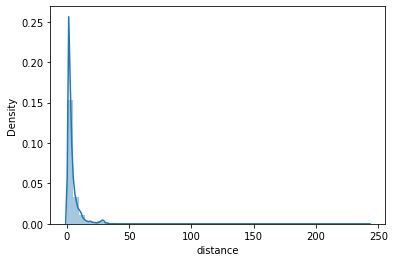

In [15]:
import seaborn as sns
#some data visulations
sns.distplot(train['distance'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


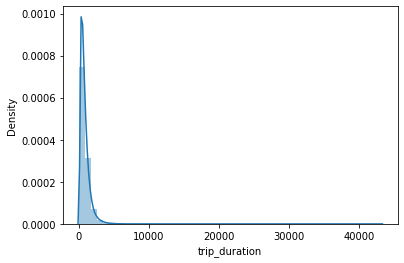

In [16]:
sns.distplot(train['trip_duration'])

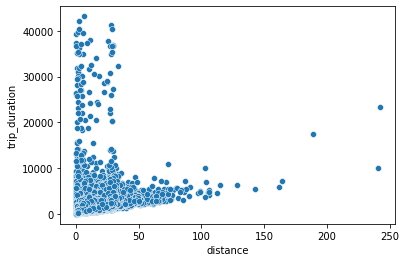

In [16]:
sns.scatterplot(x="distance",y="trip_duration",data=train)

[(40.0, 41.0)]

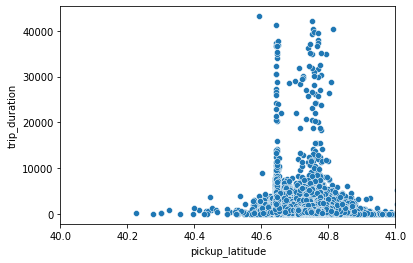

In [19]:
sns.scatterplot(x="pickup_latitude",y="trip_duration",data=train).set(xlim=(40,41))

[(-76.0, -72.0)]

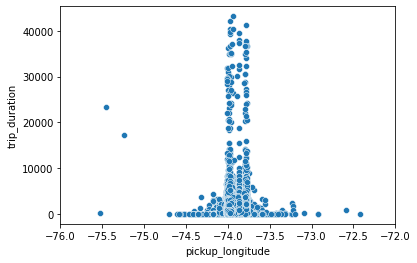

In [33]:
sns.scatterplot(x="pickup_longitude",y="trip_duration",data=train).set(xlim=(-76,-72))

[(40.0, 42.0)]

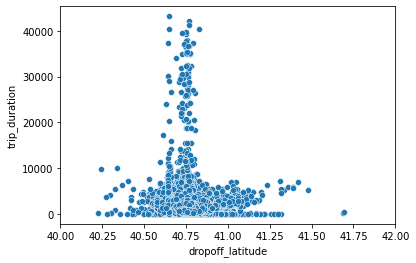

In [151]:
sns.scatterplot(x="dropoff_latitude",y="trip_duration",data=train).set(xlim = (40,42))

[(-76.0, -72.0)]

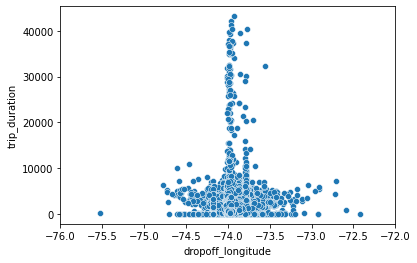

In [152]:
sns.scatterplot(x="dropoff_longitude",y="trip_duration",data=train).set(xlim=(-76,-72))

[(-74.5, -72.5), (40.5, 41.4)]

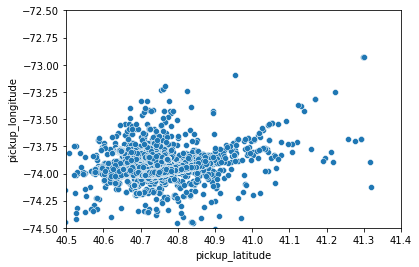

In [21]:
sns.scatterplot(x="pickup_latitude",y="pickup_longitude",data = train).set(xlim=(40.5,41.4),ylim=(-74.5,-72.5))

[(-74.5, -72.5), (40.5, 41.4)]

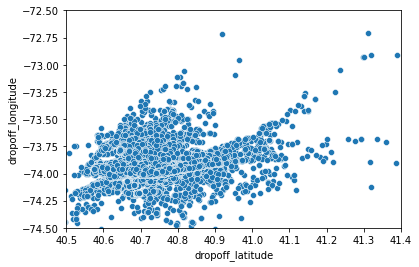

In [22]:
sns.scatterplot(x="dropoff_latitude",y="dropoff_longitude",data = train).set(xlim=(40.5,41.4),ylim=(-74.5,-72.5))

In [61]:
#calculating proximity to high traffic areas using difference in lat/long coordinates rather than calculating actual distance
#Lincoln Tunnel (40.760221,-74.003261)
train["lt_p_lat"] = abs(train["pickup_latitude"]- 40.760221)
train["lt_p_long"] = abs(train["pickup_longitude"] - -74.003261)
train["lt_p"] = train["lt_p_lat"] + train["lt_p_long"]
train["lt_d_lat"] = abs(train["dropoff_latitude"]- 40.760221)
train["lt_d_long"] = abs(train["dropoff_longitude"] - -74.003261)
train["lt_d"] = train["lt_d_lat"] + train["lt_d_long"]

test["lt_p_lat"] = abs(test["pickup_latitude"]- 40.760221)
test["lt_p_long"] = abs(test["pickup_longitude"] - -74.003261)
test["lt_p"] = test["lt_p_lat"] + test["lt_p_long"]
test["lt_d_lat"] = abs(test["dropoff_latitude"]- 40.760221)
test["lt_d_long"] = abs(test["dropoff_longitude"] - -74.003261)
test["lt_d"] = test["lt_d_lat"] + test["lt_d_long"]


#Holland Tunnel (40.726097,-74.010946)
train["ht_p_lat"] = abs(train["pickup_latitude"]- 40.726097)
train["ht_p_long"] = abs(train["pickup_longitude"] - -74.010946)
train["ht_p"] = train["lt_p_lat"] + train["lt_p_long"]
train["ht_d_lat"] = abs(train["dropoff_latitude"]- 40.726097)
train["ht_d_long"] = abs(train["dropoff_longitude"] - -74.010946)
train["ht_d"] = train["ht_d_lat"] + train["ht_d_long"]

test["ht_p_lat"] = abs(test["pickup_latitude"]- 40.726097)
test["ht_p_long"] = abs(test["pickup_longitude"] - -74.010946)
test["ht_p"] = test["lt_p_lat"] + test["lt_p_long"]
test["ht_d_lat"] = abs(test["dropoff_latitude"]- 40.726097)
test["ht_d_long"] = abs(test["dropoff_longitude"] - -74.010946)
test["ht_d"] = test["ht_d_lat"] + test["ht_d_long"]

#Brooklyn Bridge (40.708045,-73.999284)
train["bb_p_lat"] = abs(train["pickup_latitude"]- 40.708045)
train["bb_p_long"] = abs(train["pickup_longitude"] - -73.9992846)
train["bb_p"] = train["lt_p_lat"] + train["lt_p_long"]
train["bb_d_lat"] = abs(train["dropoff_latitude"]- 40.708045)
train["bb_d_long"] = abs(train["dropoff_longitude"] - -73.999284)
train["bb_d"] = train["bb_d_lat"] + train["bb_d_long"]

test["bb_p_lat"] = abs(test["pickup_latitude"]- 40.708045)
test["bb_p_long"] = abs(test["pickup_longitude"] - -73.9992846)
test["bb_p"] = test["lt_p_lat"] + test["lt_p_long"]
test["bb_d_lat"] = abs(test["dropoff_latitude"]- 40.708045)
test["bb_d_long"] = abs(test["dropoff_longitude"] - -73.999284)
test["bb_d"] = test["bb_d_lat"] + test["bb_d_long"]

#George Washington Bridge (40.849551,-73.942328)
train["gwb_p_lat"] = abs(train["pickup_latitude"]- 40.849551)
train["gwb_p_long"] = abs(train["pickup_longitude"] - -73.942328)
train["gwb_p"] = train["lt_p_lat"] + train["lt_p_long"]
train["gwb_d_lat"] = abs(train["dropoff_latitude"]- 40.849551)
train["gwb_d_long"] = abs(train["dropoff_longitude"] - -73.942328)
train["gwb_d"] = train["gwb_d_lat"] + train["gwb_d_long"]

test["gwb_p_lat"] = abs(test["pickup_latitude"]- 40.849551)
test["gwb_p_long"] = abs(test["pickup_longitude"] - -73.942328)
test["gwb_p"] = test["lt_p_lat"] + test["lt_p_long"]
test["gwb_d_lat"] = abs(test["dropoff_latitude"]- 40.849551)
test["gwb_d_long"] = abs(test["dropoff_longitude"] - -73.942328)
test["gwb_d"] = test["gwb_d_lat"] + test["gwb_d_long"]

#JFK (40.644960,-73.787270)
train["jfk_p_lat"] = abs(train["pickup_latitude"]- 40.644960)
train["jfk_p_long"] = abs(train["pickup_longitude"] - -73.787270)
train["jfk_p"] = train["lt_p_lat"] + train["lt_p_long"]
train["jfk_d_lat"] = abs(train["dropoff_latitude"]- 40.644960)
train["jfk_d_long"] = abs(train["dropoff_longitude"] - -73.787270)
train["jfk_d"] = train["gwb_d_lat"] + train["gwb_d_long"]

test["jfk_p_lat"] = abs(test["pickup_latitude"]- 40.644960)
test["jfk_p_long"] = abs(test["pickup_longitude"] - -73.787270)
test["jfk_p"] = test["lt_p_lat"] + test["lt_p_long"]
test["jfk_d_lat"] = abs(test["dropoff_latitude"]- 40.644960)
test["jfk_d_long"] = abs(test["dropoff_longitude"] - -73.787270)
test["jfk_d"] = test["gwb_d_lat"] + test["gwb_d_long"]

#determining the closest high traffic area to pickup and dropoff coords
train["nearest_p"] = train[["lt_p","ht_p","bb_p","gwb_p","jfk_p"]].min(axis=1)
train["nearest_d"] = train[["lt_d","ht_d","bb_d","gwb_d","jfk_d"]].min(axis=1)


test["nearest_p"] = test[["lt_p","ht_p","bb_p","gwb_p","jfk_p"]].min(axis=1)
test["nearest_d"] = test[["lt_d","ht_d","bb_d","gwb_d","jfk_d"]].min(axis=1)


[(0.0, 2.0)]

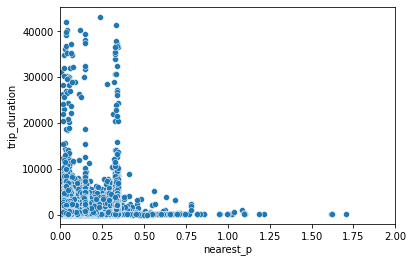

In [72]:
sns.scatterplot(x="nearest_p",y="trip_duration",data=train).set(xlim=(0,2))

[(0.0, 2.0)]

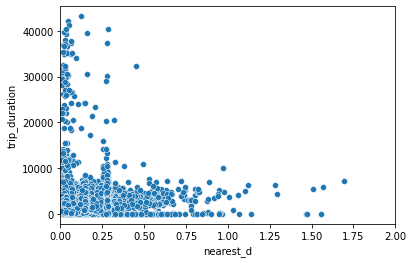

In [73]:
sns.scatterplot(x="nearest_d",y="trip_duration",data=train).set(xlim=(0,2))

In [78]:
#datetime data visualizations
import datetime
train["month"] = train["pickup_datetime"].dt.month
train["hour"] = train["pickup_datetime"].dt.hour
train["dayofweek"] = train['pickup_datetime'].dt.weekday
test["month"] = test["pickup_datetime"].dt.month
test["hour"] = test["pickup_datetime"].dt.hour
test["dayofweek"] = test['pickup_datetime'].dt.weekday


[(0.0, 2500.0)]

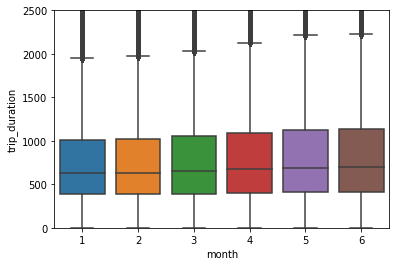

In [19]:
sns.boxplot(x="month", y="trip_duration", data=train).set(ylim=(0, 2500))

[(0.0, 25.0)]

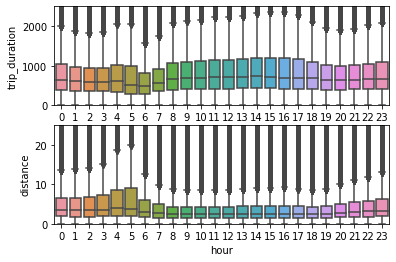

In [104]:
import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
sns.boxplot(x="hour",y="trip_duration",data=train).set(ylim=(0,2500))
plt.subplot(2,1,2)
sns.boxplot(x="hour",y="distance",data=train).set(ylim=(0,25))

[(0.0, 2500.0)]

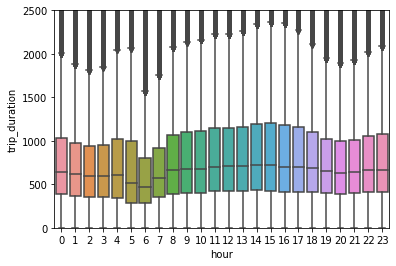

In [20]:
sns.boxplot(x="hour",y="trip_duration",data=train).set(ylim=(0,2500))

[(0.0, 25.0)]

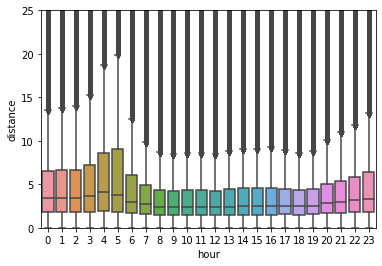

In [21]:
sns.boxplot(x="hour",y="distance",data=train).set(ylim=(0,25))

[(0.0, 2500.0)]

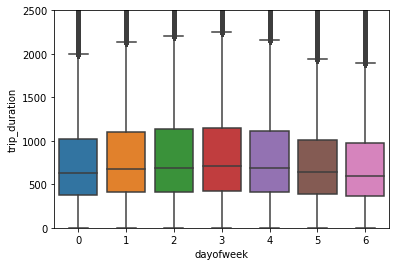

In [22]:
sns.boxplot(x="dayofweek",y='trip_duration',data=train).set(ylim=(0,2500))

[(0.0, 15.0)]

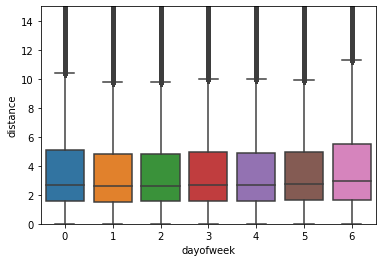

In [35]:
sns.boxplot(x="dayofweek",y='distance',data=train).set(ylim=(0,15))

[(0.0, 15.0)]

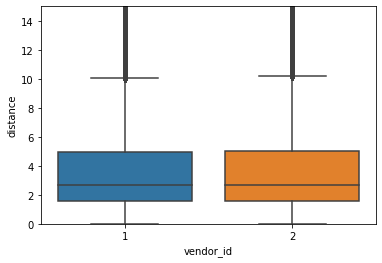

In [41]:
sns.boxplot(x="vendor_id",y='distance',data=train).set(ylim=(0,15))

In [45]:
train.groupby(['passenger_count']).trip_duration.describe()

,count,mean,std,min,25%,50%,75%,max
passenger_count,,,,,,,,
1,1032216.0,826.542037,681.803302,1.0,391.0,654.0,1060.0,43177.0
2,210007.0,880.156828,743.594767,1.0,415.0,688.0,1119.0,37856.0
3,59775.0,869.941263,720.703708,2.0,418.0,686.0,1108.0,39301.0
4,28346.0,888.359381,704.938268,2.0,422.0,697.0,1132.0,10380.0
5,77870.0,847.949570,731.891357,2.0,400.0,668.0,1083.0,40357.0
6,48198.0,838.775509,699.315900,2.0,398.0,661.0,1071.0,38028.0
7,3.0,19.666667,5.033223,15.0,17.0,19.0,22.0,25.0
9,1.0,560.000000,NaN,560.0,560.0,560.0,560.0,560.0


In [46]:
train.groupby(['store_and_fwd_flag']).trip_duration.describe()

,count,mean,std,min,25%,50%,75%,max
store_and_fwd_flag,,,,,,,,
N,1448375.0,837.458839,695.025727,1.0,396.0,661.0,1071.0,43177.0
Y,8041.0,1081.269991,925.595506,2.0,456.0,813.0,1401.0,9984.0


In [80]:
#selecting our variables for our models
X = train[["vendor_id","month","hour","dayofweek","passenger_count","store_and_fwd_flag","distance","nearest_p","nearest_d"]]
y = train["trip_duration"]
test_X = test[["vendor_id","month","hour","dayofweek","passenger_count","store_and_fwd_flag","distance","nearest_p","nearest_d"]]
X = pd.get_dummies(X, drop_first=True)
test_X = pd.get_dummies(test_X, drop_first = True)

In [64]:
#train/test split for cross validation
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size=0.3)

In [65]:
#Linear Regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_X, train_y)
model1 = lin_reg.predict(val_X)
#duration cannot be less than 1 so setting all values less than 1 to 1
model1[model1<1] = 1

In [66]:
from sklearn.metrics import mean_squared_log_error
model1_accuracy = mean_squared_log_error(val_y,model1)
model1_accuracy

0.3235925879868238

In [115]:
#Stdev of variables
stdev = []
for i in train_X.columns:
    std = X[i].std()
    stdev.append(std)


[0.4988234299427335,
 1.6810145686658806,
 6.3990210655643605,
 1.9540088403226514,
 1.313595969245421,
 5.249055109572531,
 0.08306417846422248,
 0.07616571752279445,
 0.07409864199630804]

In [145]:
#use coeff * stdev to get importance of each variable
importance = pd.DataFrame(lin_reg.coef_, train_X.columns,columns=['coefficient'])
importance["stdev"]=stdev
importance["importance"] = abs(importance['coefficient']*importance['stdev'])
importance

,coefficient,stdev,importance
vendor_id,3.144842,0.498823,1.568721
month,18.260849,1.681015,30.696753
hour,4.075563,6.399021,26.079612
dayofweek,-12.039416,1.954009,23.525124
passenger_count,3.409248,1.313596,4.478374
distance,96.436657,5.249055,506.201328
nearest_p,20.886034,0.083064,1.734881
nearest_d,-382.232994,0.076166,29.113050
store_and_fwd_flag_Y,50.106179,0.074099,3.712800


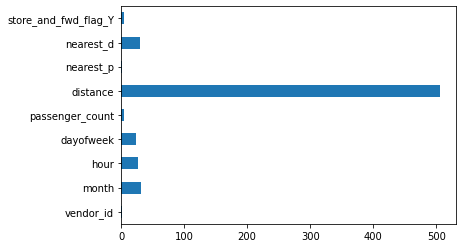

In [146]:
importance['importance'].plot(kind='barh')

In [124]:
#create submission file for linear regression
y_pred1=lin_reg.predict(test_X)
y_pred1[y_pred1<1] = 1
result1=pd.DataFrame()
result1['id']=test['id']
result1['trip_duration']=y_pred1
result1.to_csv('lin_reg.csv', index=False)

In [ ]:
#RandomForestRegressor Model
from sklearn.ensemble import RandomForestRegressor
for_reg = RandomForestRegressor()
for_reg.fit(train_X, train_y)

In [74]:
model2 = for_reg.predict(val_X)
model2_accuracy = mean_squared_log_error(val_y,model2)
model2_accuracy

0.1949831681752546

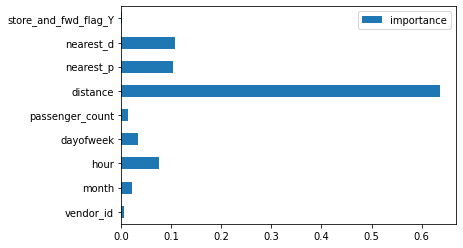

In [147]:
#feature importance
pd.DataFrame(for_reg.feature_importances_, train_X.columns,columns=['importance']).plot(kind='barh')

In [134]:
#create submission file for the random forest regressor model
y_pred2=for_reg.predict(test_X)
y_pred2[y_pred2<1] = 1
result2=pd.DataFrame()
result2['id']=test['id']
result2['trip_duration']=y_pred2
result2.to_csv('for_reg.csv', index=False)

In [86]:
#Create DMatrices for xgboost model
import xgboost as xgb
dtrain = xgb.DMatrix(data=train_X,label = train_y)
dval = xgb.DMatrix(data=val_X,label = val_y)
dtest = xgb.DMatrix(data = test_X)

In [127]:
#train XGBoost
param = {'max_depth':10,'eta':0.3,'objective':'reg:linear','eval_metric':"rmse","booster":'gbtree'}
boost = xgb.train(params=param,dtrain=dtrain)
model3 = boost.predict(dval)
model3[model3<1] = 1
model3_accuracy = mean_squared_log_error(val_y,model3)
model3_accuracy

[04:27:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.19127893887670797

In [137]:
#Changing parameters
param2 = {'max_depth':10,'eta':0.25,'objective':'reg:linear','eval_metric':"rmse","booster":'gbtree'}
boost2 = xgb.train(params=param2,dtrain=dtrain)
model3b = boost2.predict(dval)
model3b[model3b<1] = 1
model3b_accuracy = mean_squared_log_error(val_y,model3b)
model3b_accuracy

[04:39:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.18978229842343078

In [140]:
param3 = {'max_depth':15,'eta':0.25,'objective':'reg:linear','eval_metric':"rmse","booster":'gbtree'}
boost3 = xgb.train(params=param3,dtrain=dtrain)
model3c = boost3.predict(dval)
model3c[model3c<1] = 1
model3c_accuracy = mean_squared_log_error(val_y,model3c)
model3c_accuracy

[04:42:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.18489008186237546

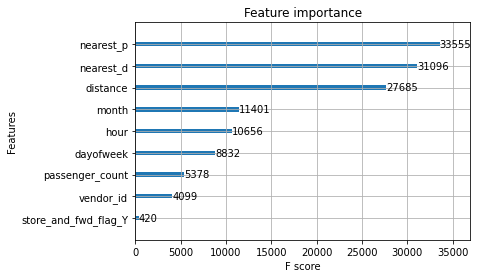

In [143]:
#Feature importance
xgb.plot_importance(boost3)

In [149]:
#Create submissionfile for XGBoost Model
y_pred3=boost3.predict(dtest)
y_pred3[y_pred3<1] = 1
result3=pd.DataFrame()
result3['id']=test['id']
result3['trip_duration']=y_pred3
result3.to_csv('xgboost.csv', index=False)